# Gaussian swirls 

## Part 1: Bivariate Normal Distribution

Let's start with Gaussians. You are most likely familiar with the normal distribution, or "bell curve", and its paremeters of mean and variance. So I will skip an explanation of what that is. The data in this design is a 2 dimensional normal distribution. So now we have two means, and instead of variance we have *covariance*. More specifically, we have a covariance matrix, to capture the entire dimensionality and shape of the data. 

First an explanation of covariance: recall in the 1d case how variance describes how spread out the points are. Covariance explains how two variables *covary*. Hence, covariance and correlation are tightly related intuitively and mathematically - when there is strong positive covariance between two variables, there is also a positive correlation. 

For two variables A, and B, where the covariance between two variables is designated as \\(\sigma_{A,B}\\), the covariance matrix is defined as follows:

\begin{bmatrix}
\sigma_{A,A}  & \sigma_{A,B}\\ 
\sigma_{B,A} & \sigma_{B,B} 
\end{bmatrix}

The order of the variables doesn't matter, so the values in the northeast diagonal are identical. The below figure (taken from [here](https://cookierobotics.com/007/)) illustrates how changing the values in the covariance matrix affect the shape of the distribution.

<img src='./img/covar.png' width="60%" style="display: block; margin-left: auto; margin-right: auto;"> </img>

We can generate a random 2d normal distribution using numpy:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

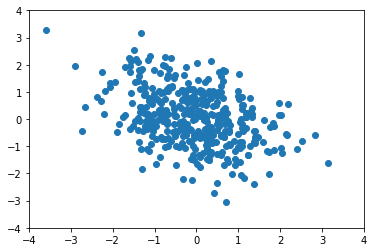

In [10]:
cov = [[1,-0.4],
       [-0.4,1]]

data = np.random.multivariate_normal(mean=[0,0],cov=cov,size=400)
plt.xlim((-4,4)); plt.ylim((-4,4))
plt.scatter(data[:,0], data[:,1]); plt.show()

## Part 2: Rotating the data in space, and keeping track of where the points move

Having considered such a "disk" of datapoints, I asked myself: what if one were to transport this disk into a 3 dimensional space, look at the points from the side, and see how the  order of these points changes as the disk rotates? Would any cool patterns arise? How does changing the covariance matrix affect these patterns?

In a somewhat trivial base case, you might intuit that a single point, rotating around some given centerpoint, would just look like a sine wave if we went through the above process.

The code below takes in a 2d set of points, then rotates it one full revolution. During each discrete step of the rotating process, it keeps track of the order of the points using a dictionary (`positions`), and appends that current order to a list (`arrangements`). This list is then plotted using `plt.imshow`, where shade of the point indicates its order relative to the rest of the list. 

If some of this is confusing, I've added some extra plots at the bottom of this notebook to visualize a simple example.

In [2]:
centroid = lambda X,Y: (sum(X)/len(X),sum(Y)/len(X)) #find center of a 2d set of points x,y

def rotate(point,center,theta):
    """rotate a point around the center by theta radians"""
    x,y = point[0],point[1]
    sin,cos = np.sin(theta), np.cos(theta)
    
    #translate to origin
    x -= center[0]
    y -= center[1]
    
    #rotate point
    x_new = x*cos - y*sin
    y_new = x*sin + y*cos
    
    # translate point back to same distance from origin
    x = x_new + center[0]
    y = y_new + center[1]
    
    return (x,y)
    
    
def roto360(x,y,step=0.01):
    """records new order of points if x pos changes
    Each point has its own index in dict"""
    coords = dict.fromkeys(list(range(len(x)))) #coordinate system at theta = 0, this stays constant
    center = centroid(x,y) #centroid of point cluster; might want to play around with different types of centers
    
    for i in range(len(x)):
        coords[i] = (x[i],y[i])
    
    positions = {k: v[1] for k, v in coords.items()} #contains x coordinates, updates new x upon rotation 
    
    arg1 = []
    inv_pos0 = {v[0]: k for k, v in coords.items()}
    for x in sorted(inv_pos0.keys()):
        arg1.append(inv_pos0[x])
    
    arrangements = [arg1] #initialize with first orders; appends new ordered positions if orders change upon rotation
    angles = np.arange(0,2*np.pi,step)
    for n_i, theta in enumerate(angles):
        prev_arg = arrangements[-1]
        curr_arg = []
        for point in positions.keys(): #point is point's static index (e.g., 0)
            xy = coords[point]
            positions[point] = rotate(xy,center,theta)[0] #grab new x coord
        inv_pos = {v: k for k, v in positions.items()}
        for x in sorted(inv_pos.keys()):
            curr_arg.append(inv_pos[x]) #appending point indices, ordered
        
        if prev_arg != curr_arg:
            arrangements.append(curr_arg)
    
    return arrangements

In [3]:
from matplotlib.colors import LinearSegmentedColormap

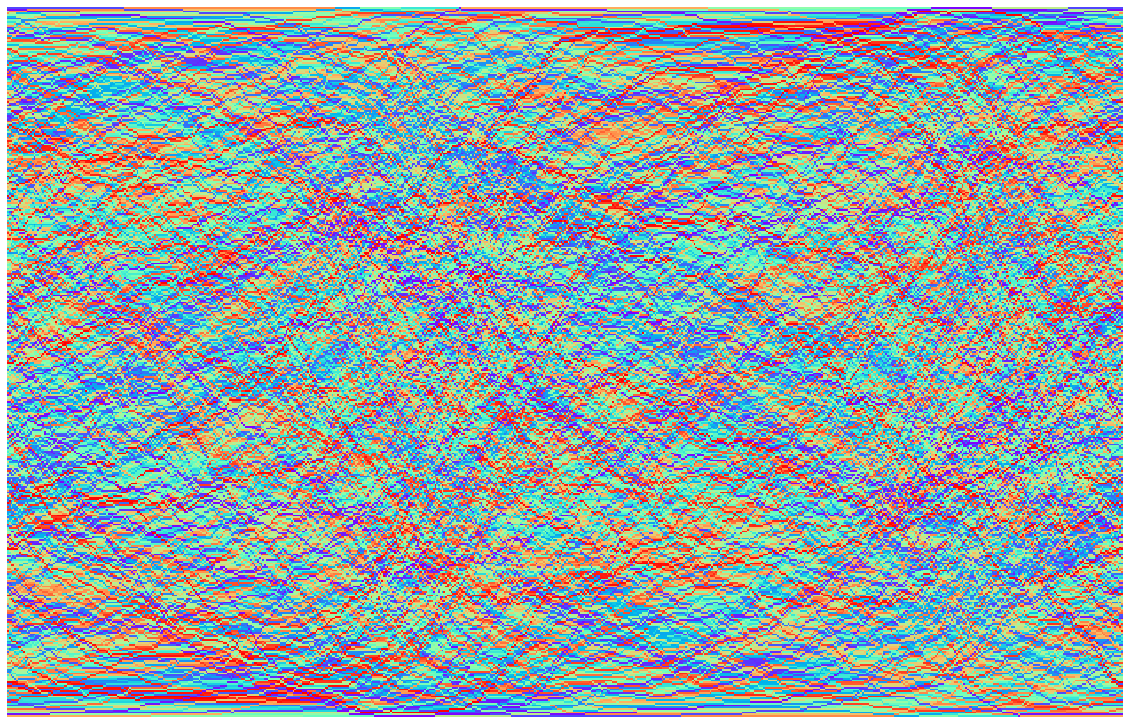

In [35]:
plt.figure(figsize = (20,20))
plt.imshow(np.array(point_rankings).T, cmap = plt.cm.rainbow)
plt.axis('off')
plt.show()

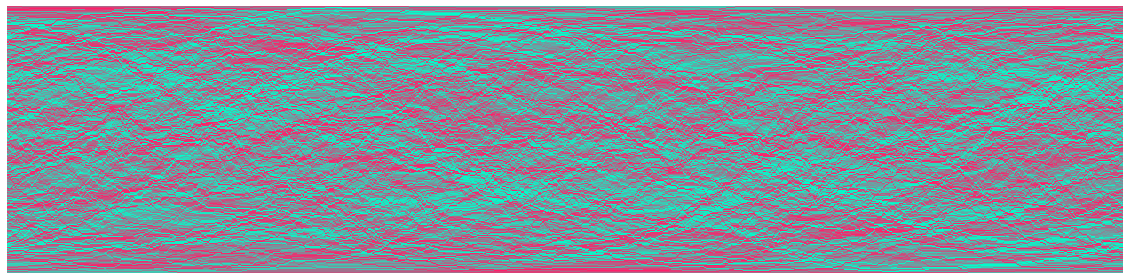

In [13]:
cov = [[6,-0.5],
       [-0.5,6]]
data = np.random.multivariate_normal(mean=[0,0],cov=cov,size=300)

point_rankings = roto360(data[:,0], data[:,1],step=.005)

plt.figure(figsize = (20,20))
# cm = LinearSegmentedColormap.from_list('mycmap', ['#3734eb', '#34eba2'])
cm = LinearSegmentedColormap.from_list('mycmap', ['#ff1f69', '#00ffcc'])
plt.imshow(np.array(point_rankings).T, cmap = cm)
plt.axis('off')
plt.savefig('./img/swirl1.png', dpi=500, bbox_inches='tight')
plt.show()

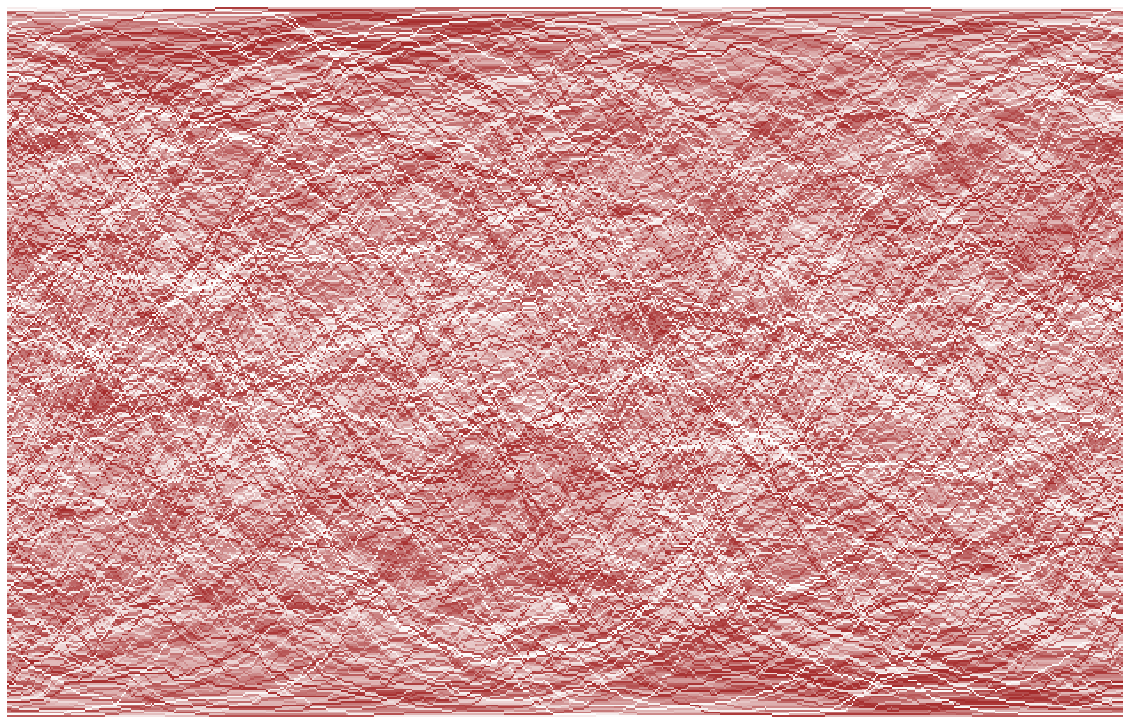

In [48]:
cov = [[1,-0.4],
       [-0.4,1]]
data = np.random.multivariate_normal(mean=[0,0],cov=cov,size=400)

point_rankings = roto360(data[:,0], data[:,1],step=.01)

plt.figure(figsize = (20,20))
cm = LinearSegmentedColormap.from_list('mycmap', ['white', 'brown'])

plt.imshow(np.array(a2).T, cmap = cm)
plt.axis('off')
plt.show()

## A very simple case illustrating the rotating principle

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

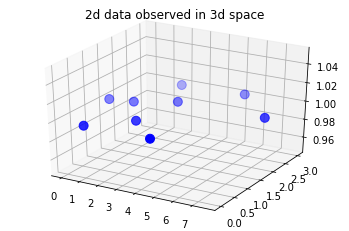

In [31]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
xt = [0  ,1,1.2,1.9,2.7,3,4.5,5.2,7.6] #"random" points
yt = [1.5,0,1.6,2.9,0.7,2,  0,  3,  2]
z = [np.ones(9)] # constant z axis

ax.scatter(xt,yt,z, color='blue',s=80)
ax.set_title('2d data observed in 3d space')
plt.show()

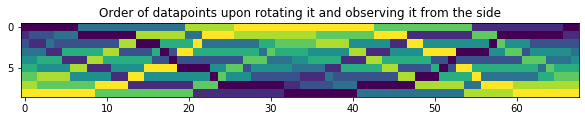

In [37]:
arrangements = roto360(xt,yt)
plt.figure(figsize=(10,10))
plt.imshow(np.array(arrangements).T)
plt.title('Order of datapoints upon rotating it and observing it from the side'); plt.show()